<a href="https://colab.research.google.com/github/enasshalolh/my_coulb_project/blob/main/Citywide_Survey_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the Data

In [32]:
import os


file_path = "/content/Citywide_Survey.csv"

df = pd.read_csv(file_path)

df.head()


,hh_id,weight,cms_zone,survey_mode,person_id,person_num,is_participant,num_days,num_days_complete,num_trips,...,race_native_hawaiian,race_white,race_other,disability_hearing,disability_seeing,disability_walking,disability_mobility,disability_dressing,disability_concentrating,disability_none
0,191546322,0.00000,Inner Brooklyn,1,19154632203,3,0,NaN,NaN,NaN,...,995,995,995,995,995,995,995,995,995,995
1,191546322,0.00000,Inner Brooklyn,1,19154632202,2,0,NaN,NaN,NaN,...,995,995,995,995,995,995,995,995,995,995
2,191546322,212.12729,Inner Brooklyn,1,19154632201,1,1,7.0,7.0,23.0,...,1,0,0,0,0,0,0,0,0,1
3,19241657,0.00000,Middle Queens,1,1924165703,3,0,NaN,NaN,NaN,...,995,995,995,995,995,995,995,995,995,995
4,19241657,0.00000,Middle Queens,1,1924165702,2,0,NaN,NaN,NaN,...,995,995,995,995,995,995,995,995,995,995


2. Clean the Data
      

Handling missing values, replacing invalid values, and filtering columns

In [33]:
import numpy as np

# Keep only numerical columns
df_numeric = df.select_dtypes(include=[np.number]).copy()

# Replace 995 with NaN as it appears to represent missing values
df_numeric.replace(995, np.nan, inplace=True)

# Remove columns with more than 50% missing values
threshold = 0.5 * len(df_numeric)
df_numeric.dropna(axis=1, thresh=threshold, inplace=True)

# Fill remaining NaN values with the median of each column
df_numeric.fillna(df_numeric.median(), inplace=True)

# Display cleaned data
df_numeric.head()


,hh_id,weight,survey_mode,person_id,person_num,is_participant,relationship,age,employment,worker,student,missing_work_location,missing_school_location
0,191546322,0.00000,1,19154632203,3,0,5,9,3.0,1.0,0,0,0
1,191546322,0.00000,1,19154632202,2,0,5,8,6.0,0.0,0,0,0
2,191546322,212.12729,1,19154632201,1,1,0,5,6.0,0.0,1,0,1
3,19241657,0.00000,1,1924165703,3,0,3,8,1.0,1.0,0,0,0
4,19241657,0.00000,1,1924165702,2,0,3,7,6.0,0.0,0,0,0


3. Remove Unnecessary Columns


In [34]:
# Drop ID columns as they are not useful for clustering
df_features = df_numeric.drop(columns=["hh_id", "person_id"], errors='ignore')

# Display the data after column removal
df_features.head()


,weight,survey_mode,person_num,is_participant,relationship,age,employment,worker,student,missing_work_location,missing_school_location
0,0.00000,1,3,0,5,9,3.0,1.0,0,0,0
1,0.00000,1,2,0,5,8,6.0,0.0,0,0,0
2,212.12729,1,1,1,0,5,6.0,0.0,1,0,1
3,0.00000,1,3,0,3,8,1.0,1.0,0,0,0
4,0.00000,1,2,0,3,7,6.0,0.0,0,0,0


4.Apply K-Means Without Normalization & Determine Optimal Clusters (Elbow Method)

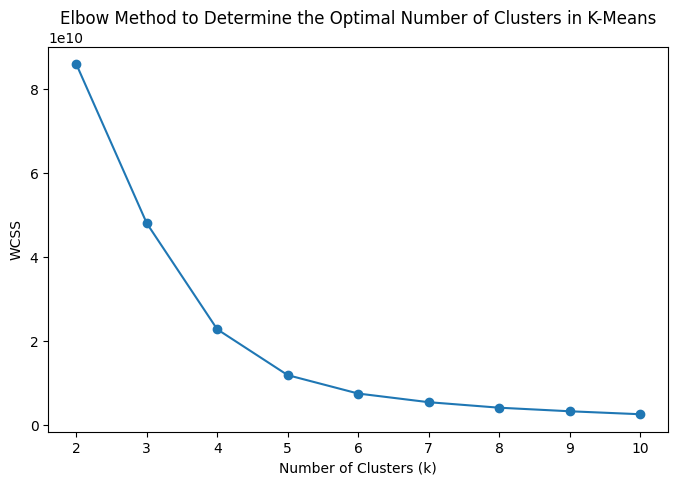

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for k in range(2, 11):  # Testing from 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method to Determine the Optimal Number of Clusters in K-Means")
plt.show()


5.Apply K-Means, DBSCAN, Hierarchical Clustering Without Normalization


In [36]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

# Choose the optimal K from the Elbow Method
optimal_k = 4

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_features["KMeans_Cluster"] = kmeans.fit_predict(df_features)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_features["DBSCAN_Cluster"] = dbscan.fit_predict(df_features)

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
df_features["Hierarchical_Cluster"] = hierarchical.fit_predict(df_features)

# Display results
df_features.head()


,weight,survey_mode,person_num,is_participant,relationship,age,employment,worker,student,missing_work_location,missing_school_location,KMeans_Cluster,DBSCAN_Cluster,Hierarchical_Cluster
0,0.00000,1,3,0,5,9,3.0,1.0,0,0,0,0,-1,1
1,0.00000,1,2,0,5,8,6.0,0.0,0,0,0,0,-1,1
2,212.12729,1,1,1,0,5,6.0,0.0,1,0,1,0,-1,1
3,0.00000,1,3,0,3,8,1.0,1.0,0,0,0,0,0,1
4,0.00000,1,2,0,3,7,6.0,0.0,0,0,0,0,1,1


6.Plot the Dendrogram for Hierarchical Clustering

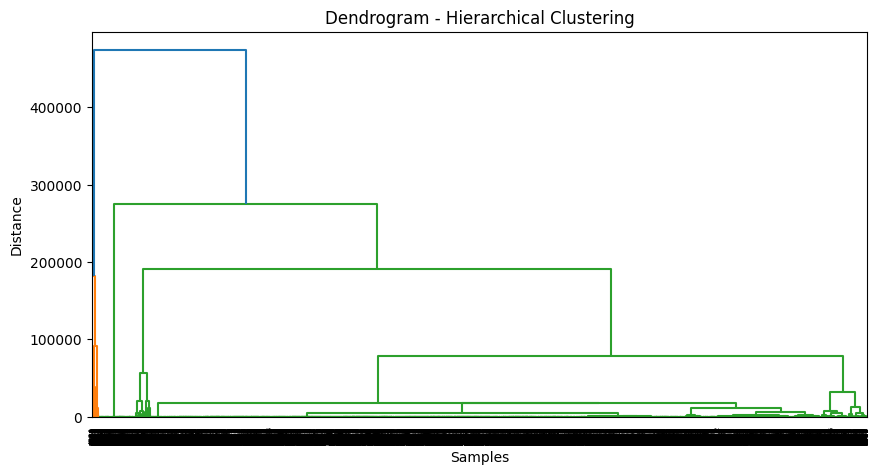

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute linkage for hierarchical clustering
linked = linkage(df_features.drop(columns=["KMeans_Cluster", "DBSCAN_Cluster", "Hierarchical_Cluster"]), method='ward')

# Plot the Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.title("Dendrogram - Hierarchical Clustering")
plt.show()


7.Normalize the Data & Reapply Clustering Algorithms

In [38]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features.drop(columns=["KMeans_Cluster", "DBSCAN_Cluster", "Hierarchical_Cluster"]))

# Apply K-Means after normalization
kmeans_scaled = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_features["KMeans_Cluster_Scaled"] = kmeans_scaled.fit_predict(df_scaled)

# Apply DBSCAN after normalization
dbscan_scaled = DBSCAN(eps=0.5, min_samples=5)
df_features["DBSCAN_Cluster_Scaled"] = dbscan_scaled.fit_predict(df_scaled)

# Apply Hierarchical Clustering after normalization
hierarchical_scaled = AgglomerativeClustering(n_clusters=optimal_k)
df_features["Hierarchical_Cluster_Scaled"] = hierarchical_scaled.fit_predict(df_scaled)

# Display results after normalization
df_features.head()


,weight,survey_mode,person_num,is_participant,relationship,age,employment,worker,student,missing_work_location,missing_school_location,KMeans_Cluster,DBSCAN_Cluster,Hierarchical_Cluster,KMeans_Cluster_Scaled,DBSCAN_Cluster_Scaled,Hierarchical_Cluster_Scaled
0,0.00000,1,3,0,5,9,3.0,1.0,0,0,0,0,-1,1,0,0,2
1,0.00000,1,2,0,5,8,6.0,0.0,0,0,0,0,-1,1,2,1,1
2,212.12729,1,1,1,0,5,6.0,0.0,1,0,1,0,-1,1,1,2,3
3,0.00000,1,3,0,3,8,1.0,1.0,0,0,0,0,0,1,0,0,2
4,0.00000,1,2,0,3,7,6.0,0.0,0,0,0,0,1,1,2,1,1


8.Apply Gaussian Mixture Model (GMM)


In [39]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df_features["GMM_Cluster"] = gmm.fit_predict(df_scaled)

# Display results
df_features.head()


,weight,survey_mode,person_num,is_participant,relationship,age,employment,worker,student,missing_work_location,missing_school_location,KMeans_Cluster,DBSCAN_Cluster,Hierarchical_Cluster,KMeans_Cluster_Scaled,DBSCAN_Cluster_Scaled,Hierarchical_Cluster_Scaled,GMM_Cluster
0,0.00000,1,3,0,5,9,3.0,1.0,0,0,0,0,-1,1,0,0,2,0
1,0.00000,1,2,0,5,8,6.0,0.0,0,0,0,0,-1,1,2,1,1,1
2,212.12729,1,1,1,0,5,6.0,0.0,1,0,1,0,-1,1,1,2,3,1
3,0.00000,1,3,0,3,8,1.0,1.0,0,0,0,0,0,1,0,0,2,0
4,0.00000,1,2,0,3,7,6.0,0.0,0,0,0,0,1,1,2,1,1,1


9.Evaluate Clustering Quality Using Silhouette Score & Adjusted Rand Score

In [40]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Compute Silhouette Scores
silhouette_kmeans = silhouette_score(df_scaled, df_features["KMeans_Cluster_Scaled"])
silhouette_dbscan = silhouette_score(df_scaled, df_features["DBSCAN_Cluster_Scaled"])
silhouette_hierarchical = silhouette_score(df_scaled, df_features["Hierarchical_Cluster_Scaled"])
silhouette_gmm = silhouette_score(df_scaled, df_features["GMM_Cluster"])

# Print Silhouette Scores
print(f"Silhouette Score:")
print(f"K-Means: {silhouette_kmeans:.4f}")
print(f"DBSCAN: {silhouette_dbscan:.4f}")
print(f"Hierarchical: {silhouette_hierarchical:.4f}")
print(f"GMM: {silhouette_gmm:.4f}")

# Compute Adjusted Rand Score (ARS) using K-Means as a reference
ars_gmm = adjusted_rand_score(df_features["KMeans_Cluster_Scaled"], df_features["GMM_Cluster"])
ars_dbscan = adjusted_rand_score(df_features["KMeans_Cluster_Scaled"], df_features["DBSCAN_Cluster_Scaled"])
ars_hierarchical = adjusted_rand_score(df_features["KMeans_Cluster_Scaled"], df_features["Hierarchical_Cluster_Scaled"])

# Print Adjusted Rand Scores
print(f"\nAdjusted Rand Score (compared to K-Means):")
print(f"GMM: {ars_gmm:.4f}")
print(f"DBSCAN: {ars_dbscan:.4f}")
print(f"Hierarchical: {ars_hierarchical:.4f}")


Silhouette Score:
K-Means: 0.3337
DBSCAN: 0.4486
Hierarchical: 0.3278
GMM: 0.2925

Adjusted Rand Score (compared to K-Means):
GMM: 0.6265
DBSCAN: 0.2202
Hierarchical: 0.8445
